In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_data = pd.read_csv('/content/2.01.+Admittance.csv')

In [5]:
raw_data.head()

SAT Admitted
0  1363       No
1  1792      Yes
2  1954      Yes
3  1653       No
4  1593       No

In [6]:
data = raw_data.copy()
data['Admitted'] = data['Admitted'].map({'Yes': 1, 'No': 0})

In [7]:
data.head(10)

SAT  Admitted
0  1363         0
1  1792         1
2  1954         1
3  1653         0
4  1593         0
5  1755         1
6  1775         1
7  1887         1
8  1893         1
9  1580         0

In [8]:
y = data['Admitted']
x1 = data['SAT']

Text(0, 0.5, 'Admitted')

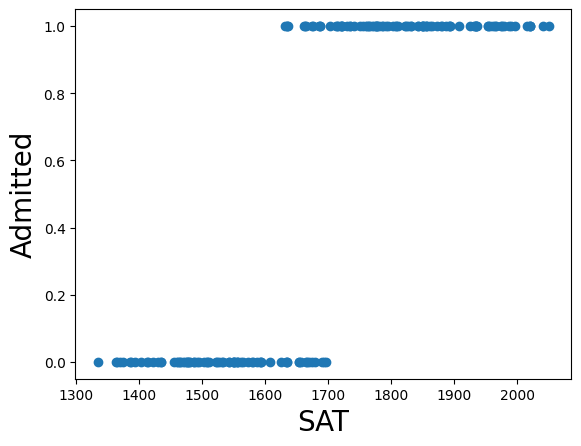

In [9]:
plt.scatter(x1, y, color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize=20)

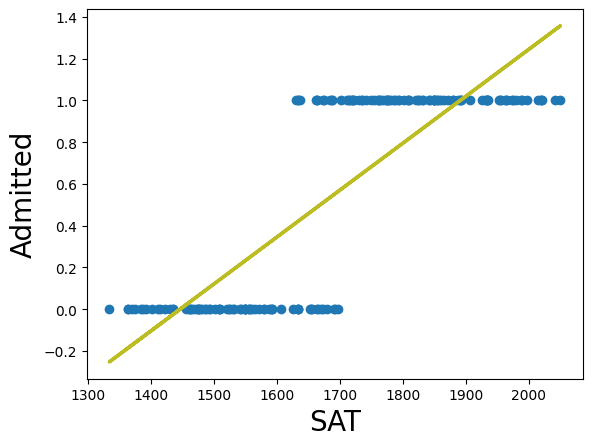

In [10]:
x = sm.add_constant(x1)
reg_lin = sm.OLS(y,x)
results_lin = reg_lin.fit()

plt.scatter(x1,y,color = 'C0')
y_hat = x1*results_lin.params[1]+results_lin.params[0]

plt.plot(x1,y_hat,lw=2.5,color='C8')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.show()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


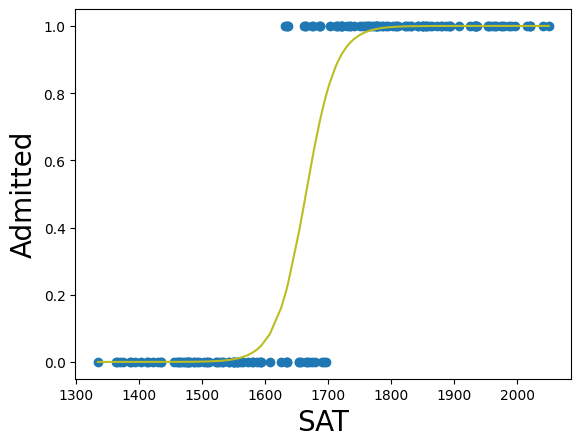

In [11]:
reg_log = sm.Logit(y,x)
results_log = reg_log.fit()

def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1) / (1 + np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0],results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')
plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize = 20)
plt.plot(x_sorted,f_sorted,color='C8')
plt.show()

In [12]:
X = sm.add_constant(x1)
reg_log = sm.Logit(y, X)
result_log = reg_log.fit()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [13]:
from scipy import stats
stats.chisquare = lambda chisq , df: stats.chi2.sf(chisq, df)

In [14]:
result_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Fri, 13 Oct 2023   Pseudo R-squ.:                  0.7992
Time:                        02:27:36   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""